In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tfk.layers
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("image size : ", train_images[0].shape)
print("image components : ", train_images[0][10])
# 0から1の浮動小数点の値に変換する
print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)
train_zero = (train_images[(train_labels == 0)].reshape(-1, 784)).T/255
train_one = (train_images[(train_labels == 1)].reshape(-1, 784)).T/255
train_two = (train_images[(train_labels == 2)].reshape(-1, 784)).T/255

train_ae = np.hstack((train_zero[:, 1000:1100], train_one[:, 1000:1100], train_two[:,1000:1100]))
train_label_ae = np.hstack([np.zeros(100), np.ones(100),np.array([2. for i in range(100)])])

11501568/11490434 [==============================] - 0s 0us/step
image size :  (28, 28)
image components :  [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


In [ ]:
model = models.Sequential([
        tfkl.Dense(2, activation='relu', input_shape=(28*28,)), 
        tfkl.Dense(784, activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_ae.T, train_ae.T,
                    batch_size= 16, epochs=10,
                    shuffle=True, validation_data=(train_ae.T, train_ae.T))

Epoch 1/10
19/19 [==============================] - 2s 15ms/step - loss: 0.1161 - val_loss: 0.1055
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0984 - val_loss: 0.0912
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0874 - val_loss: 0.0841
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0830 - val_loss: 0.0820
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0818 - val_loss: 0.0814
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0813 - val_loss: 0.0810
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0809 - val_loss: 0.0806
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0804 - val_loss: 0.0800
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0796 - val_loss: 0.0790
Epoch 10/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0784 - val_loss: 0.0774


Text(0, 0.5, 'y')

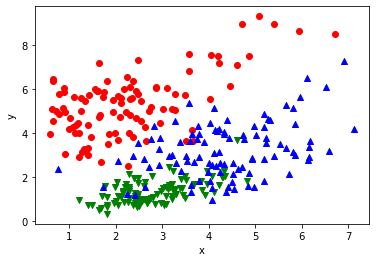

In [ ]:
ae_w = model.layers[0].get_weights()[0]
#ae_w /= np.linalg.norm(ae_w, axis=0)
ae_x, ae_y = np.dot(ae_w.T, train_ae)
plt.scatter(ae_x[:100], ae_y[:100], marker="o", color='Red')  # 0に対応する点
plt.scatter(ae_x[100:200], ae_y[100:200], marker="v", color='Green')#1に対応する点
plt.scatter(ae_x[200:], ae_y[200:], marker="^", color='Blue') # 2に対応する点
plt.xlabel("x")
plt.ylabel("y")